[2, 20, 4, 18, 26, 15, 14, 11, 13, 23, 22, 0, 7, 6, 5, 1, 3, 24, 16, 25, 9, 10, 8, 19, 21, 12, 17]
171.0291194248555
[2, 20, 4, 18, 26, 15, 14, 11, 13, 23, 22, 0, 7, 6, 5, 1, 3, 24, 16, 25, 9, 10, 8, 19, 21, 12, 17]
171.0291194248555
[2, 20, 4, 18, 26, 15, 14, 11, 13, 23, 22, 0, 7, 6, 5, 1, 3, 24, 16, 25, 9, 10, 8, 19, 21, 12, 17]
171.0291194248555
[12, 0, 17, 5, 3, 2, 1, 19, 21, 8, 18, 4, 20, 10, 13, 22, 6, 7, 16, 11, 26, 15, 23, 14, 25, 24, 9]
169.3822750060035
[12, 0, 17, 5, 3, 2, 1, 19, 21, 8, 18, 4, 20, 10, 13, 22, 6, 7, 16, 11, 26, 15, 23, 14, 25, 24, 9]
169.3822750060035
[12, 0, 17, 5, 3, 2, 1, 19, 21, 8, 18, 4, 20, 10, 13, 22, 6, 7, 16, 11, 26, 15, 23, 14, 25, 24, 9]
169.3822750060035
[20, 21, 11, 4, 0, 1, 3, 16, 24, 19, 10, 13, 22, 9, 6, 18, 17, 8, 2, 26, 15, 23, 14, 25, 12, 5, 7]
167.7692618738283
[20, 11, 0, 6, 3, 21, 1, 12, 19, 5, 4, 18, 17, 22, 23, 26, 15, 14, 7, 2, 24, 16, 8, 10, 13, 25, 9]
160.77613057801065
[20, 11, 0, 6, 3, 21, 1, 12, 19, 5, 4, 18, 17, 22, 23, 26, 15, 

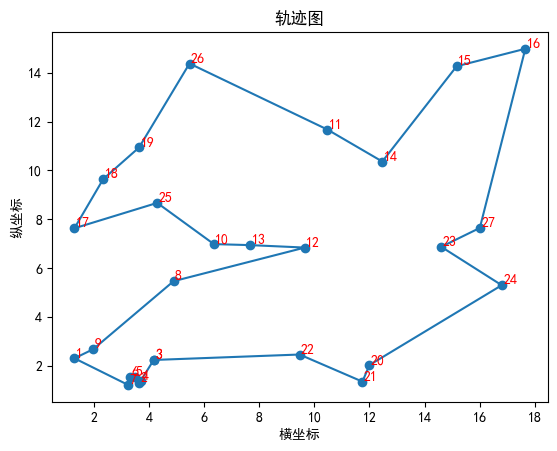

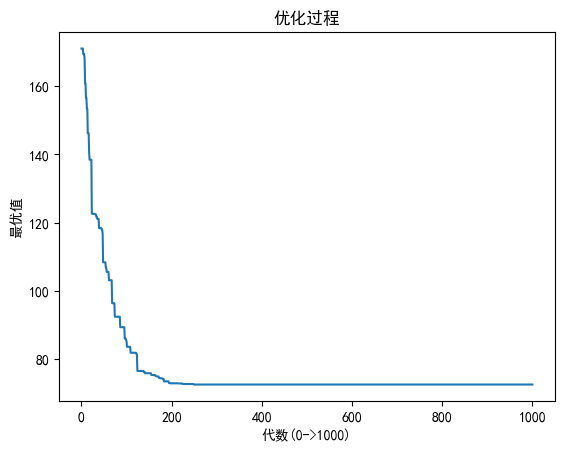

In [1]:
#遗传算法求解TSP问题完整代码：
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
 
# 处理数据
 
coord = []
with open("data1.txt", "r") as lines:
    lines = lines.readlines()
for line in lines:
    xy = line.split()
    coord.append(xy)
 
coord = np.array(coord)
w, h = coord.shape
coordinates = np.zeros((w, h), float)
for i in range(w):
    for j in range(h):
        coordinates[i, j] = float(coord[i, j])
 
# print(coordinates)
 
# 得到距离矩阵
 
distance = np.zeros((w, w))
for i in range(w):
    for j in range(w):
        distance[i, j] = distance[j, i] = np.linalg.norm(coordinates[i] - coordinates[j])
 
# 种群数
count = 300
 
# 进化次数
iter_time = 1000
 
# 最优选择概率
retain_rate = 0.3  # 适应度前30%可以活下来
 
# 弱者生存概率
random_select_rate = 0.5
 
# 变异
mutation_rate = 0.1
 
# 改良
gailiang_N = 3000
 
 
# 适应度
def get_total_distance(x):
    dista = 0
    for i in range(len(x)):
        if i == len(x) - 1:
            dista += distance[x[i]][x[0]]
        else:
            dista += distance[x[i]][x[i + 1]]
    return dista
 
# 初始种群的改良
def gailiang(x):
    distance = get_total_distance(x)
    gailiang_num = 0
    while gailiang_num < gailiang_N:
        while True:
            a = random.randint(0, len(x) - 1)
            b = random.randint(0, len(x) - 1)
            if a != b:
                break
        new_x = x.copy()
        temp_a = new_x[a]
        new_x[a] = new_x[b]
        new_x[b] = temp_a
        if get_total_distance(new_x) < distance:
            x = new_x.copy()
        gailiang_num += 1
 
 
# 自然选择
 
def nature_select(population):
    grad = [[x, get_total_distance(x)] for x in population]
    grad = [x[0] for x in sorted(grad, key=lambda x: x[1])]
    # 强者
    retain_length = int(retain_rate * len(grad))
    parents = grad[: retain_length]
    # 生存下来的弱者
    for ruozhe in grad[retain_length:]:
        if random.random() < random_select_rate:
            parents.append(ruozhe)
    return parents
 
 
# 交叉繁殖
def crossover(parents):
    target_count = count - len(parents)
    children = []
    while len(children) < target_count:
        while True:
            male_index = random.randint(0, len(parents)-1)
            female_index = random.randint(0, len(parents)-1)
            if male_index != female_index:
                break
        male = parents[male_index]
        female = parents[female_index]
        left = random.randint(0, len(male) - 2)
        right = random.randint(left, len(male) - 1)
        gen_male = male[left:right]
        gen_female = female[left:right]
        child_a = []
        child_b = []
 
        len_ca = 0
        for g in male:
            if len_ca == left:
                child_a.extend(gen_female)
                len_ca += len(gen_female)
            if g not in gen_female:
                child_a.append(g)
                len_ca += 1
 
        len_cb = 0
        for g in female:
            if len_cb == left:
                child_b.extend(gen_male)
                len_cb += len(gen_male)
            if g not in gen_male:
                child_b.append(g)
                len_cb += 1
 
        children.append(child_a)
        children.append(child_b)
    return children
 
 
# 变异操作
def mutation(children):
    for i in range(len(children)):
        if random.random() < mutation_rate:
            while True:
                u = random.randint(0, len(children[i]) - 1)
                v = random.randint(0, len(children[i]) - 1)
                if u != v:
                    break
            temp_a = children[i][u]
            children[i][u] = children[i][v]
            children[i][v] = temp_a
 
 
def get_result(population):
    grad = [[x, get_total_distance(x)] for x in population]
    grad = sorted(grad, key=lambda x: x[1])
    return grad[0][0], grad[0][1]
 
 
population = []
# 初始化种群
index = [i for i in range(w)]
for i in range(count):
    x = index.copy()
    random.shuffle(x)
    gailiang(x)
    population.append(x)
 
distance_list = []
result_cur_best, dist_cur_best = get_result(population)
distance_list.append(dist_cur_best)
 
i = 0
while i < iter_time:
    # 自然选择
    parents = nature_select(population)
 
    # 繁殖
    children = crossover(parents)
 
    # 变异
    mutation(children)
 
    # 更新
    population = parents + children
 
    result_cur_best, dist_cur_best = get_result(population)
    distance_list.append(dist_cur_best)
    i = i + 1
    print(result_cur_best)
    print(dist_cur_best)
 
 
for i in range(len(result_cur_best)):
    result_cur_best[i] += 1
 
result_path = result_cur_best
result_path.append(result_path[0])
 
print(result_path)
 
# 画图
X = []
Y = []
for index in result_path:
    X.append(coordinates[index-1, 0])
    Y.append(coordinates[index-1, 1])
 
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.figure(1)
plt.plot(X, Y, '-o')
for i in range(len(X)):
    plt.text(X[i] + 0.05, Y[i] + 0.05, str(result_path[i]), color='red')
plt.xlabel('横坐标')
plt.ylabel('纵坐标')
plt.title('轨迹图')
 
plt.figure(2)
plt.plot(np.array(distance_list))
plt.title('优化过程')
plt.ylabel('最优值')
plt.xlabel('代数({}->{})'.format(0, iter_time))
plt.show()